In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [2]:
import os

BASE_DATA_DIR = 'type_dir'
TRAIN_DIR = os.path.join(BASE_DATA_DIR,'train')
TEST_DIR = os.path.join(BASE_DATA_DIR,'test')

print(TRAIN_DIR)
print(TEST_DIR)

type_dir\train
type_dir\test


In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (210, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

val_datagen = ImageDataGenerator(rescale=1.255)

val_generator = val_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (210, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 12990 images belonging to 6 classes.
Found 687 images belonging to 6 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(210, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 208, 148, 4)       112       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 104, 74, 4)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 102, 72, 8)        296       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 51, 36, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 34, 16)        1168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6528)             

In [22]:
history = model.fit(
    train_generator,
    epochs = 10,
    verbose = 1,
    validation_data = val_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 650 steps, validate for 69 steps
Epoch 1/10
650/650 [==============================] - 366s 563ms/step - loss: 1.6123 - accuracy: 0.3183 - val_loss: 272.3647 - val_accuracy: 0.3333
Epoch 2/10
650/650 [==============================] - 288s 443ms/step - loss: 1.5524 - accuracy: 0.3554 - val_loss: 332.8343 - val_accuracy: 0.3144
Epoch 3/10
650/650 [==============================] - 262s 404ms/step - loss: 1.4857 - accuracy: 0.3877 - val_loss: 228.8095 - val_accuracy: 0.3464
Epoch 4/10
650/650 [==============================] - 260s 400ms/step - loss: 1.3798 - accuracy: 0.4402 - val_loss: 402.3516 - val_accuracy: 0.3188
Epoch 5/10
650/650 [==============================] - 239s 368ms/step - loss: 1.2405 - accuracy: 0.5025 - val_loss: 505.2709 - val_accuracy: 0.3435
Epoch 6/10
650/650 [==============================] - 238s 367ms/step - loss: 1.0972 - accuracy: 0.5602 - val_loss: 418.5824 - val_accuracy: 0.3333
Epoch 7/10
650/650 

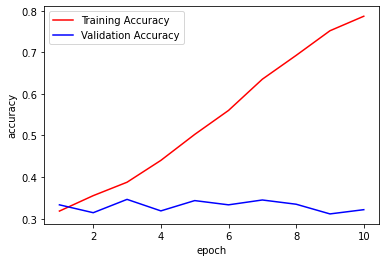

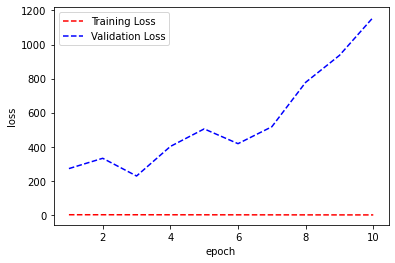

In [23]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epoch = range(1, len(train_acc)+1)
plt.figure(1)
plt.plot(epoch, train_acc, 'r-')
plt.plot(epoch, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.figure(2)
plt.plot(epoch, train_loss, 'r--')
plt.plot(epoch, val_loss, 'b--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
model.save("type_classifier_1.0.0")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: type_classifier_1.0.0\assets
